## Edit Distance

El problema general es si tengo dos secuencias de caracteres - $x$, $y$ - cuál es la forma mas barata de convertir $x$ en $y$ si las operaciones permitidas son: 

- Insertar un caracter.
- Borrar un caracter.
- Reemplazar un caracter por otro.

Los costos de cada operación están definidos de antemano. 

### Una aplicación de edit distance: 

Tengo dos palabras: 

1. Heroglyphology
2. Michaelangelo 

Cuál es la sequencia de letras común mas grande?


Para escribir este problema en términos de edit distance definamos los siguientes costos: 

1. Insertar $y[j]$ antes de $x[i]$ cuesta $1$.
2. Borrar $x[i]$ cuesta $1$.
3. Reemplazar $x[i]$ con $y[j]$ cuesta $0$ si son iguales, $ + \infty$ sino.


La idea de las operaciones es la siguiente. Queremos transformar $x$ en $y$: 

- La primera es equivalente a borrar la letra $y[j]$ de $y$. 
- La segunda borra $x[i]$ de $x$.
- La tercera sirve para reconocer si $x[i]$ y $y[j]$ son iguales y pasar a $x[: i+1]$ y $y[: j+1]$.


### El programa: 

Voy a usar palabras mas simples: 

1. x = halo 
2. y = lo

La idea es la siguiente: Vamos a comparar las palabras desde el final. 


Luego de algunos pasos del algoritmo llego a la siguiente configuración: 

<img src='prefix.jpg' width="400" height="350">

El siguiente paso es comparar $x[i]$ con $y[j]$, tengo tres opciones: 

- borrar $x[i]$,
- insertar $y[j]$,
- reemplazar $x[i]$ con $y[j]$.


Podemos minimizar la última operación: 

$$  
\begin{align*}
cost[i, j] = \min ( \ 
 &\text{borrar} \ x[i] + cost[i+1, \ j], \\
 &\text{insertar} \ y[j] + cost[i, \ j+1], \\
 &\text{reemplazar} \ x[i] \rightarrow y[j] + cost[i+1, \ j+1] 
\end{align*}
$$  

El costo de cada estado es el costo de la última operación mas el costo de haber llegado a la configuración original. 


Si comenzamos desde el final tenemos: 

<img src='proc.png' width="500" height="350">

La tabla completa: 

<table>
    <tr>
        <td>  </td>
        <td> H </td>
        <td> A </td>
        <td> L </td>
        <td> O </td>
        <td> - </td>
    </tr>
    <tr>
        <td> L </td>
        <td> 2 $\rightarrow$  </td>
        <td> 1  $\rightarrow$ </td>
        <td> 0  $\searrow$   </td>
        <td> 1  $\downarrow$ </td>
        <td> 2  $\downarrow$ </td>
    </tr>
    <tr>
        <td> O </td>
        <td> 3 $\rightarrow$</td>
        <td> 2 $\rightarrow$</td>
        <td> 1 $\rightarrow$</td>
        <td> 0 $\searrow$</td>
        <td> 1 $\downarrow$</td>
    </tr>
    <tr>
        <td> - </td>
        <td> 4 $\rightarrow$</td>
        <td> 3 $\rightarrow$</td>
        <td> 2 $\rightarrow$</td>
        <td> 1 $\rightarrow$</td>
        <td> 0 </td>
    </tr>
</table>

La posición $i, \ j$ contiene el costo de comparar $x[i:]$ con $y[j:]$. Las flechas muestan la solución que minimiza el paso $i, \ j $. 

In [15]:
x = list('halo-')
y = list('lo-')

print('x=', x, '\ny=', y)

x= ['h', 'a', 'l', 'o', '-'] 
y= ['l', 'o', '-']


In [276]:
import numpy as np

In [17]:
erase_x = 1
insert_y = 1

In [18]:
nx = len(x)
ny = len(y)

cost = np.zeros((ny, nx))  # store min
moves = np.zeros((ny, nx)) # store argmin

In [19]:
# llenar la última fila: 
for i in reversed(range(nx-1)):
    cost[ny-1, i] = erase_x + cost[ny-1, i+1]

print(cost[ny-1, :])


# llenar la última columna: 
for j in reversed(range(ny-1)):
    cost[j, nx-1] = insert_y + cost[j+1, nx-1]

print(cost[:, nx-1])


[ 4.  3.  2.  1.  0.]
[ 2.  1.  0.]


In [20]:
for j in reversed(range(ny-1)):
    for i in reversed(range(nx-1)):
        if x[i] == y[j]:
            match = 0
        else:
            match = np.inf
            
        cost[j, i] = min(match + cost[j+1, i+1],
                erase_x + cost[j, i+1], 
                insert_y + cost[j+1, i])

In [21]:
cost

array([[ 2.,  1.,  0.,  1.,  2.],
       [ 3.,  2.,  1.,  0.,  1.],
       [ 4.,  3.,  2.,  1.,  0.]])

### Guardar los movimientos

Necesito 2 tablas: una para los costos y otra para las operaciones (flechas).

<table>
    <tr>
        <td>  </td>
        <td> H </td>
        <td> A </td>
        <td> L </td>
        <td> O </td>
        <td> - </td>
    </tr>
    <tr>
        <td> L </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 2 </td>
    </tr>
    <tr>
        <td> O </td>
        <td> 3 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> - </td>
        <td> 4 </td>
        <td> 3 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
</table>

<table>
    <tr>
        <td>  </td>
        <td> H </td>
        <td> A </td>
        <td> L </td>
        <td> O </td>
        <td> - </td>
    </tr>
    <tr>
        <td> L </td>
        <td> $\rightarrow$  </td>
        <td> $\rightarrow$ </td>
        <td> $\searrow$   </td>
        <td> $\downarrow$ </td>
        <td> $\downarrow$ </td>
    </tr>
    <tr>
        <td> O </td>
        <td> $\rightarrow$</td>
        <td> $\rightarrow$</td>
        <td> $\rightarrow$</td>
        <td> $\searrow$</td>
        <td> $\downarrow$</td>
    </tr>
    <tr>
        <td> - </td>
        <td> $\rightarrow$</td>
        <td> $\rightarrow$</td>
        <td> $\rightarrow$</td>
        <td> $\rightarrow$</td>
        <td> - </td>
    </tr>

</table>

In [1]:
def costLongestSeq(x, y):
    ''' 
    Dynamic Program que calcula el COSTO de la secuencia común mas grande. 
    
    inputs:
        - dos strings: x, y.
    outputs: 
        - cost: los costos.
        - moves: los movimientos.
    '''

    x = list(x)
    y = list(y)
    
    x.append('-')
    y.append('-')
    
    erase_x = 1
    insert_y = 1

    nx = len(x)
    ny = len(y)

    cost = np.zeros((ny, nx))  # store min
    moves = np.zeros((ny, nx)) # store argmin

    # llenar la última fila: 
    for i in reversed(range(nx-1)):
        cost[ny-1, i] = erase_x + cost[ny-1, i+1]
        moves[ny-1, i] = 1

    # llenar la última columna: 
    for j in reversed(range(ny-1)):
        cost[j, nx-1] = insert_y + cost[j+1, nx-1]
        moves[j, nx-1] = 2 

    for j in reversed(range(ny-1)):
        for i in reversed(range(nx-1)):
            if x[i] == y[j]:
                match = 0
            else:
                match = np.inf

            comp = [match + cost[j+1, i+1],
                    erase_x + cost[j, i+1], 
                    insert_y + cost[j+1, i]]
            cost[j, i] = min(comp)
            moves[j, i] = np.argmin(comp)
            
    return cost, moves

In [2]:
help(costLongestSeq)

Help on function costLongestSeq in module __main__:

costLongestSeq(x, y)
    Dynamic Program que calcula el COSTO de la secuencia común mas grande. 
    
    inputs:
        - dos strings: x, y.
    outputs: 
        - cost: los costos.
        - moves: los movimientos.



In [41]:
cost, moves = costLongestSeq('halo', 'lo')
print('cost = \n', cost)
print('moves = \n', moves)

cost = 
 [[ 2.  1.  0.  1.  2.]
 [ 3.  2.  1.  0.  1.]
 [ 4.  3.  2.  1.  0.]]
moves = 
 [[ 1.  1.  0.  2.  2.]
 [ 1.  1.  1.  0.  2.]
 [ 1.  1.  1.  1.  0.]]


In [278]:
def longestSeq(x, y, moves):
    ''' 
    Calcula la secuencia común mas grande. 
    
    inputs:
        - dos strings: x, y.
        - una matriz moves de movimientos. 
    outputs: 
        - la secuencia común mas larga.
    '''
    
    i = 0
    j = 0

    word = list(x)

    ny = len(list(y))
    nx = len(word)

    lSeq = []

    while j < nx and i < ny:
        if moves[i, j] == 0:
            # replace x[j] with y[i]
            lSeq.append(word[j])
            i = i + 1
            j = j + 1
        elif moves[i, j] == 1:
            # delete x[j]
            j = j + 1
        elif moves[i, j] == 2:
            # insert y[i]
            i = i + 1        
    return(''.join(lSeq))

In [43]:
help(longestSeq)

Help on function longestSeq in module __main__:

longestSeq(x, y, moves)
    Calcula la secuencia común mas grande. 
    
    inputs:
        - dos strings: x, y.
        - una matriz moves de movimientos. 
    outputs: 
        - la secuencia común mas larga.



In [44]:
longestSeq('halo', 'lo', moves)

'lo'

In [45]:
x = 'heroglyphology'
y = 'michaelangelo'

cost, moves = costLongestSeq(x, y)
longestSeq(x, y, moves)

'hello'

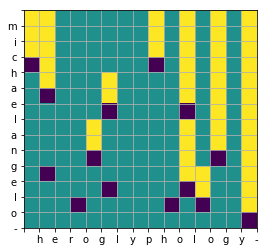

In [29]:
nx = len(x)
ny = len(y)

import matplotlib.pylab as plt

w1 = list(x)
w1.insert(0, '')
w1.append('-')

w2 = list(y)
w2.insert(0, '')
w2.append('-')

im = plt.imshow(moves)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, nx + 1, 1))
ax.set_yticks(np.arange(-.5, ny + 1, 1))
ax.set_xticklabels(w1) # np.arange(0, nx + 1, 1)
ax.set_yticklabels(w2) # np.arange(0, ny + 1, 1)

plt.grid(True)
plt.savefig('words.png', dpi=300)
plt.show()


### Ideas interesantes: 

- $x[:j]$ -> suffix, $x[j:]$ -> prefix
- reversed(range(nx-1)) ..., 3, 2, 1, 0
- list(x) -> lista
- ''.join(lista) -> string
- dibujar una matriz. 

### Ejercicios

-------------
###### 1. Fibonacci 

$$ 
\begin{cases}
\begin{align*}
F_1 &= F_2 = 1 \\
F_n &= F_{n-1} + F_{n-2}
\end{align*}
\end{cases}
$$

Calculen $F_n$.

<div>
<img src='fib2.jpg' width="300" height="350" align="">
<img src='fib1.jpg' width="300" height="350" align="">
</div>

---------------

-------------
###### 2. Cuántos Caminos?  

Consideren una grilla en $\mathbb{R}^2$. De cuántas formas puedo llegar a $(110, 111)$ desde $(0, 0)$ si solo puedo dar pasos a la derecha y arriba? 

Pueden calcular la solución usando combinatoria? 


<img src='path.jpg' width="400" height="350">

---------------

-------------
###### 3. Cambiar el costo  

Se les ocurren otros costos para Edit Distance? Cómo harían para comparar dos secuencias de ADN? 

<img src='seq.jpg' width="400" height="350">

---------------

# Ejercicios resueltos:

### Fibonacci

In [7]:
def fib(n):
    '''
    returns the nth Fibonacci number. 
    '''
    if n<=2: 
        f = 1
    else:
        f = fib(n-1) + fib(n-2)
    return(f)

In [66]:
help(fib)

fib(6)

Help on function fib in module __main__:

fib(n)
    returns the nth Fibonacci number.



8

In [67]:
memo = {} # no poner esto en el mismo cell que la def de fibMemoized

In [68]:
def fibMemoized(n):
    '''
    returns the nth Fibonacci number. 
    Memoized version.
    '''
    if str(n) in memo:
        return(memo[str(n)])
    else:
        if n<=2: f = 1
        else: f = fibMemoized(n-1) + fibMemoized(n-2)
        memo[str(n)] = f
        return(f)

In [69]:
help(fibMemoized)

Help on function fibMemoized in module __main__:

fibMemoized(n)
    returns the nth Fibonacci number. 
    Memoized version.



In [78]:
fibMemoized(6)

8

In [79]:
memo

{'1': 1, '2': 1, '3': 2, '4': 3, '5': 5, '6': 8}

In [80]:
fibMemoized(4)
memo

{'1': 1, '2': 1, '3': 2, '4': 3, '5': 5, '6': 8}

### Caminos

idea: 

Si quiero llegar desde (0, 0) hasta (x, y), en algún momento voy a llegar a la izquierda (B) o abajo (A). 

<img src='caminos.png' width="300" height="350" align="">

El número de caminos totales es la suma de todos los que llegan hasta (A) mas los que llegan a (B).

In [188]:
def nCaminos(x, y):
    '''
    number of paths from the origin to (x, y)
    allowed moves: up and right
    '''
    if 0 == x or y == 0: 
        # solo hay un camino para puntos en el borde. 
        ncaminos = 1
    elif 0 < x and 0 < y:
        # llegan hasta (A) + llegan hasta (B)
        ncaminos = nCaminos(x-1, y) + nCaminos(x, y-1)
    return(ncaminos)

In [189]:
help(nCaminos)

Help on function nCaminos in module __main__:

nCaminos(x, y)
    number of paths from the origin to (x, y)
    allowed moves: up and right



In [190]:
nCaminos(2, 2)

6

In [267]:
memo = {}

In [268]:
def nCaminosDP(x, y):
    '''
    number of paths from the origin to (x, y)
    allowed moves: up and right
    Memoized version
    '''
    if str((x, y)) in memo:
        return(memo[str((x, y))])
    else:
        if 0 == x or y == 0:  
            ncaminos = 1 
        elif 0 < x and 0 < y: 
            ncaminos = nCaminosDP(x-1, y) + nCaminosDP(x, y-1)
        memo[str((x, y))] = ncaminos
    return(ncaminos)

In [269]:
help(nCaminosDP)

Help on function nCaminosDP in module __main__:

nCaminosDP(x, y)
    number of paths from the origin to (x, y)
    allowed moves: up and right
    Memoized version



In [270]:
nCaminosDP(2, 2)

6

In [271]:
memo

{'(0, 1)': 1,
 '(0, 2)': 1,
 '(1, 0)': 1,
 '(1, 1)': 2,
 '(1, 2)': 3,
 '(2, 0)': 1,
 '(2, 1)': 3,
 '(2, 2)': 6}

In [272]:
nCaminosDP(1, 2)
memo

{'(0, 1)': 1,
 '(0, 2)': 1,
 '(1, 0)': 1,
 '(1, 1)': 2,
 '(1, 2)': 3,
 '(2, 0)': 1,
 '(2, 1)': 3,
 '(2, 2)': 6}

### Edit distance ADN

Tratamos de encontrar la manera mas barata de transformar una secuencia de ADN x, en otra y. 

Voy a usar el código de la clase. Solo voy a modificar los costos.  

- Reemplazar la base $x[i]$ por $y[j]$ cuesta $1$.

- Borrar la base $x[i]$ cuesta 2.

- Insertar la base $y[j]$ antes de $x[i]$ cuesta 2. 

La idea es que cambiar una base es 2 veces mas probable que borrar o insertar una. 

In [281]:
def costLongestSeqADN(x, y):
    ''' 
    Dynamic Program que calcula el COSTO de transformar una secuencia de AND en otra. 
    
    inputs:
        - dos secuencias de ADN: x, y.
    outputs: 
        - cost: los costos.
        - moves: los movimientos.
    '''

    x = list(x)
    y = list(y)
    
    x.append('-')
    y.append('-')
    
    erase_x = 2
    insert_y = 2
    replace_x_y = 1

    nx = len(x)
    ny = len(y)

    cost = np.zeros((ny, nx))  # store min
    moves = np.zeros((ny, nx)) # store argmin

    # llenar la última fila: 
    for i in reversed(range(nx-1)):
        cost[ny-1, i] = erase_x + cost[ny-1, i+1]
        moves[ny-1, i] = 1

    # llenar la última columna: 
    for j in reversed(range(ny-1)):
        cost[j, nx-1] = insert_y + cost[j+1, nx-1]
        moves[j, nx-1] = 2 

    for j in reversed(range(ny-1)):
        for i in reversed(range(nx-1)):
            
            comp = [replace_x_y + cost[j+1, i+1],
                    erase_x + cost[j, i+1], 
                    insert_y + cost[j+1, i]]
            cost[j, i] = min(comp)
            moves[j, i] = np.argmin(comp)
            
    return cost, moves 

In [282]:
cost, moves = costLongestSeqADN('AACGTGG', 'GAAATAGG')
print('cost = \n', cost)
print('moves = \n', moves)

cost = 
 [[  9.  10.  11.  12.  13.  14.  15.  16.]
 [  7.   8.   9.  10.  11.  12.  13.  14.]
 [  8.   6.   7.   8.   9.  10.  11.  12.]
 [  9.   7.   5.   6.   7.   8.   9.  10.]
 [ 10.   8.   6.   4.   5.   6.   7.   8.]
 [ 11.   9.   7.   5.   3.   4.   5.   6.]
 [ 12.  10.   8.   6.   4.   2.   3.   4.]
 [ 13.  11.   9.   7.   5.   3.   1.   2.]
 [ 14.  12.  10.   8.   6.   4.   2.   0.]]
moves = 
 [[ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.]]


In [283]:
longestSeq('AACGTGG', 'GGGGTAGG', moves)

'AACGTGG'

No funciona tan bien, se les ocurren mejores costos? Por ejemplo, parece que $C \rightarrow G$ es común - costo bajo. 